Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Download the wine dataset from the UCI Machine Learning Repository
LINK: https://archive.ics.uci.edu/dataset/109/wine

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = wine.iloc[:,:-1]
Y = wine['quality']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()

In [7]:
X_train_scaled = Scalar.fit_transform(X_train)
X_test_scaled = Scalar.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()

In [10]:
Model = pca.fit_transform(X_train_scaled)

In [13]:
explained_ratio = pca.explained_variance_ratio_

In [14]:
import matplotlib.pyplot as plt

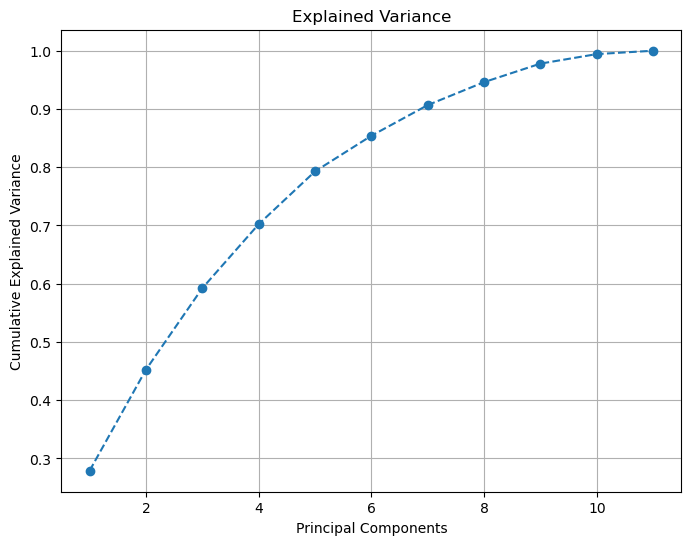

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_ratio) + 1), explained_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [16]:
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


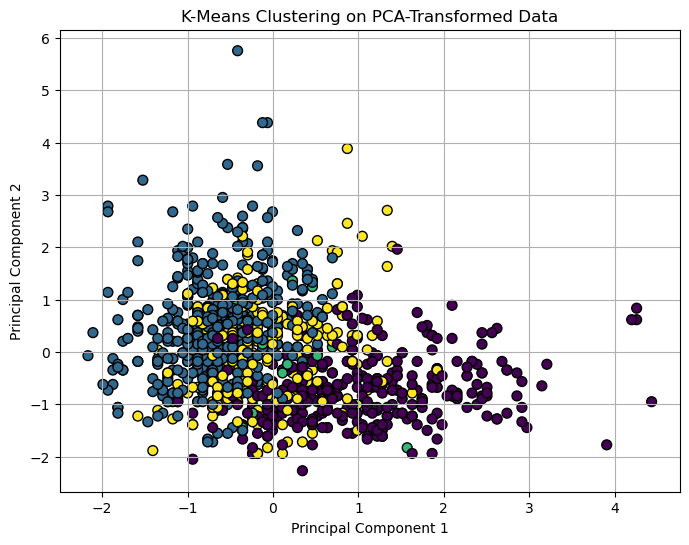

In [20]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)
labels = kmeans.labels_

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()